In [180]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with Audio files
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import tensorflow as tf
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [156]:
dog_data = "/content/drive/MyDrive/Work_space/Project/K9/dataset/dog&cat_voice"
print(os.listdir(dog_data))

['cat', 'dog']


In [163]:
print(os.listdir(dog_data)[0])
dog_voice=os.path.join(dog_data,os.listdir(dog_data)[1])
print(dog_voice)

cat
/content/drive/MyDrive/Work_space/Project/K9/dataset/dog&cat_voice/dog


In [158]:
def visulize_random_sample(folder_name):
    #to hear the audio sample
    random_sample             = np.random.randint(0,len(os.listdir(folder_name)))
    sample_sound             = os.listdir(folder_name)[random_sample]
    sample_address            =  os.path.join(folder_name , sample_sound)
    sample_sound, sample_rate = librosa.load(sample_address)
    sample_audio              = ipd.Audio(sample_sound, rate=sample_rate)
    return sample_audio

In [164]:
visulize_random_sample(dog_voice)

##Dog Sound

In [167]:
dog_sound = os.listdir(dog_voice)[5]
print(dog_sound)

dog_barking_100.wav


In [169]:
# Choose random soud from normal folder
random_normal= np.random.randint(0,len(os.listdir(dog_voice)))
dog_sound = os.listdir(dog_voice)[random_normal]

dog_sound_address = os.path.join(dog_voice,dog_sound)
dog_sound_sample,sample_rate = librosa.load(dog_sound_address)
ipd.Audio(dog_sound_sample,rate=sample_rate)

*Spectrum*

These lines of code compute the FFT  (Fast Fourier Transform) of a sound signal, extract its magnitude spectrum, compute the corresponding frequency bins, and then select the first half of the spectrum for further analysis. This frequency domain representation can be useful for various signal processing tasks, including analysis of frequency content, filtering, and feature extraction.

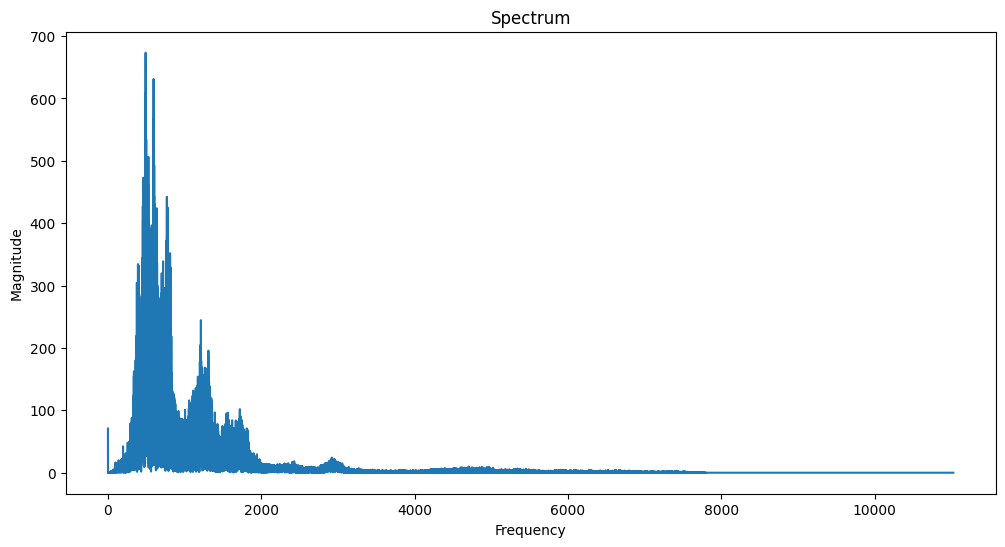

In [170]:
fft_normal = np.fft.fft(dog_sound_sample)
magnitude_normal = np.abs(fft_normal)
freq_normal = np.linspace(0,sample_rate, len(magnitude_normal))
half_freq = freq_normal[:int(len(freq_normal)/2)]
half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

plt.figure(figsize=(12,6))
plt.plot(half_freq,half_magnitude)
plt.title("Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

*Spectogram*

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

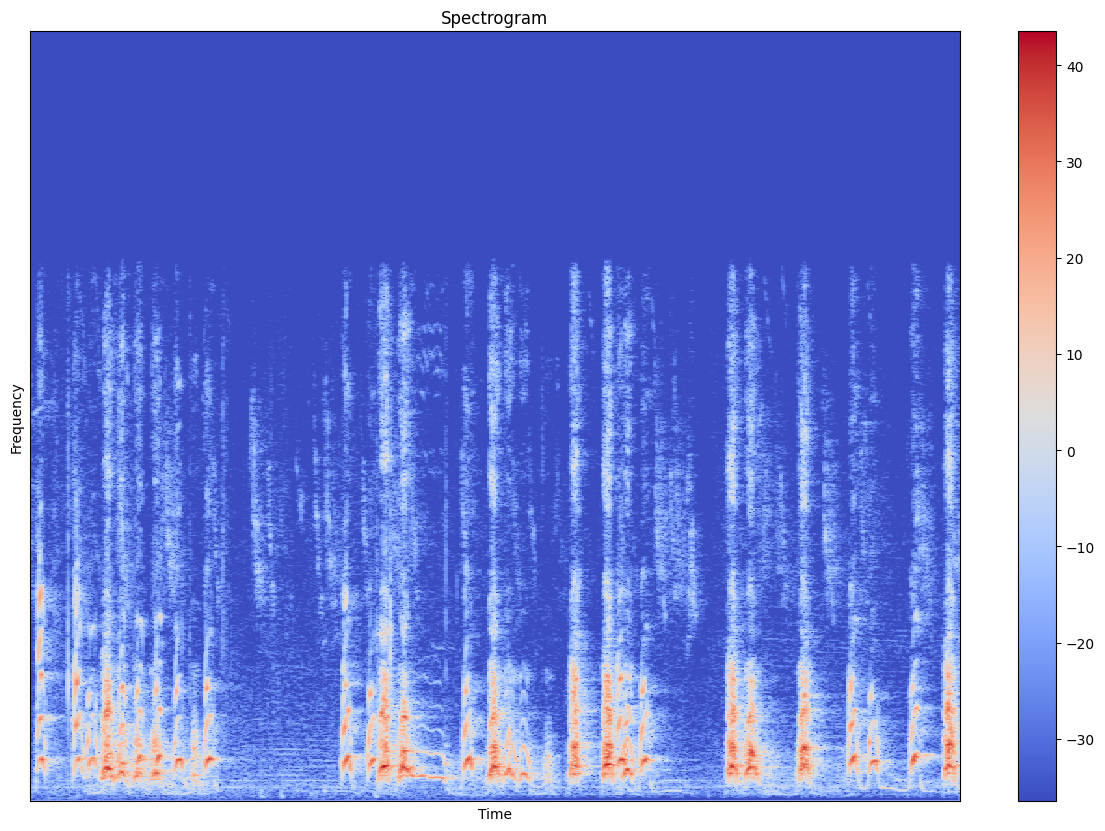

In [171]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_normal = librosa.stft(dog_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

*MFCCs*

By calling librosa.feature.mfcc(), you are computing the MFCCs of the input sound signal using the parameters specified. The resulting MFCCs variable will contain the MFCCs of the signal, which can then be used for further analysis, classification, or feature extraction tasks. MFCCs are widely used in tasks such as speech recognition, speaker identification, and music genre classification, among others, due to their effectiveness in capturing important characteristics of audio signals while discarding irrelevant information.

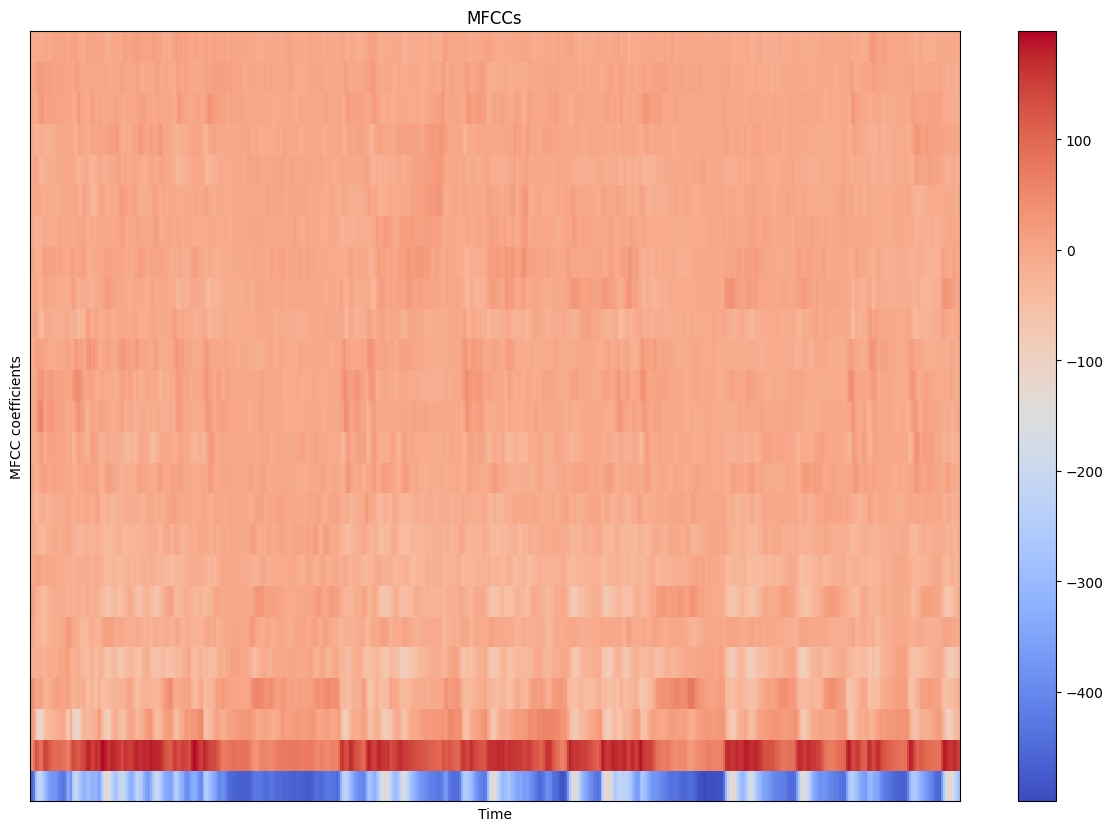

In [172]:
MFCCs = librosa.feature.mfcc(y=dog_sound_sample,sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

##Loading Data

In [173]:
import librosa
import numpy as np
import os
import fnmatch

def load_file_data(folder_path, duration):
    folder_name=os.listdir(folder_path)
    data = []
    label=[]
    for folder in folder_name:
      folder_list=os.path.join(folder_path,folder)
      #print(folder_list)
      file_name_list=os.listdir(folder_list)
      #print(file_name_list)
      for file_name in file_name_list:
          try:
              audio_path = os.path.join(folder_list, file_name)
              print(audio_path)
              X, sr = librosa.load(audio_path, duration=duration)

              # Get the actual duration of the audio
              dur = librosa.get_duration(y=X, sr=sr)

              # Fix audio length if necessary
              input_length = int(sr * duration)
              if round(dur) < duration:
                  #print("Fixing audio length:", file_name)
                  X = librosa.util.fix_length(X, size=input_length)

              # Extract normalized MFCC feature from data
              mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T, axis=0)
              feature = np.array(mfccs).reshape([-1, 1])
              data.append(feature)
              label.append(folder)
          except Exception as e:
              #print("Error encountered while parsing file:", file_name)
              print(e)
    return data,label

In [175]:
# 22 KHz
SAMPLE_RATE = 22050
# seconds
MAX_SOUND_CLIP_DURATION=10


normal_sounds,label= load_file_data(folder_path=dog_data,duration=MAX_SOUND_CLIP_DURATION)

/content/drive/MyDrive/Work_space/Project/K9/dataset/dog&cat_voice/cat/cat_1.wav
/content/drive/MyDrive/Work_space/Project/K9/dataset/dog&cat_voice/cat/cat_108.wav
/content/drive/MyDrive/Work_space/Project/K9/dataset/dog&cat_voice/cat/cat_112.wav
/content/drive/MyDrive/Work_space/Project/K9/dataset/dog&cat_voice/cat/cat_109.wav
/content/drive/MyDrive/Work_space/Project/K9/dataset/dog&cat_voice/cat/cat_114.wav
/content/drive/MyDrive/Work_space/Project/K9/dataset/dog&cat_voice/cat/cat_101.wav
/content/drive/MyDrive/Work_space/Project/K9/dataset/dog&cat_voice/cat/cat_110.wav
/content/drive/MyDrive/Work_space/Project/K9/dataset/dog&cat_voice/cat/cat_106.wav
/content/drive/MyDrive/Work_space/Project/K9/dataset/dog&cat_voice/cat/cat_102.wav
/content/drive/MyDrive/Work_space/Project/K9/dataset/dog&cat_voice/cat/cat_10.wav
/content/drive/MyDrive/Work_space/Project/K9/dataset/dog&cat_voice/cat/cat_105.wav
/content/drive/MyDrive/Work_space/Project/K9/dataset/dog&cat_voice/cat/cat_115.wav
/conten

In [189]:
print(normal_sounds,label)

[array([[-3.1402219e+02],
       [ 1.3066780e+02],
       [-2.1057266e+01],
       [ 3.7865059e+01],
       [-6.0673385e+00],
       [ 1.4439050e+01],
       [-9.0098343e+00],
       [ 3.3901904e+00],
       [-2.3148158e+00],
       [ 1.1010714e-01],
       [ 2.4127948e+00],
       [-3.2521203e+00],
       [ 1.1270224e+00],
       [-9.3102169e+00],
       [-3.5517320e-02],
       [-5.7429204e+00],
       [-6.3783154e-02],
       [-5.3443570e+00],
       [-1.1778625e+00],
       [-6.2376934e-01],
       [-4.1750851e+00],
       [-1.5315289e+00],
       [-3.1132779e+00],
       [ 2.6253808e+00],
       [-3.5134850e+00]], dtype=float32), array([[-5.1348956e+02],
       [ 1.3296388e+01],
       [-1.3046202e+01],
       [ 1.1084248e+01],
       [-5.7399468e+00],
       [ 3.3749051e+00],
       [ 6.3149530e-01],
       [ 2.3566489e+00],
       [ 3.8029740e+00],
       [ 5.1566262e+00],
       [ 5.3697276e+00],
       [ 1.7174035e+00],
       [ 1.1804048e+00],
       [-3.6286361e+00],
       

In [182]:
#normal_labels = [0 for items in normal_sounds]
#Y = np.array(tf.keras.utils.to_categorical(normal_labels, len(CLASSES)))

y=np.array(label).reshape([-1,1])
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(y)
print(Y)

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]

In [183]:
print(mlb.classes_)
NB_CLASSES=len(mlb.classes_)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(mlb.classes_)}
print (label_to_int)
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

['cat' 'dog']
{'cat': 0, 'dog': 1}
{0: 'cat', 1: 'dog'}


In [184]:
X=np.array(normal_sounds)

In [185]:
print(X.shape)
#print(Y.shape)

(277, 25, 1)


In [186]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)

In [187]:
print(x_train.shape, x_test.shape)
print(y_train.shape,y_test.shape,y_val.shape,y_test.shape)

(176, 25, 1) (56, 25, 1)
(176, 2) (56, 2) (45, 2) (56, 2)


In [197]:
TRAIN_IMG_COUNT = len(label)
print(len(label))
COUNT_0 = label.count("cat")
print("cat count :", COUNT_0)

COUNT_1 = label.count("dog")
print("dog count :", COUNT_1)
weight_for_0 = TRAIN_IMG_COUNT / (2 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (2 * COUNT_1)
class_weight = {0: weight_for_0, 1: weight_for_1,}
class_weight

277
cat count : 164
dog count : 113


{0: 0.8445121951219512, 1: 1.2256637168141593}

##Training model

In [198]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.regularizers import l2
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [199]:
model = Sequential()

model.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape = (25,1)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

model.add(Dense(2, activation='sigmoid'))



model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 25, 256)           133120    
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 25, 128)           32896     
                                                                 
 dropout_4 (Dropout)         (None, 25, 128)           0         
                                                                 
 dense_21 (Dense)            (None, 25, 128)           16512     
                                                                 
 dense_22 (Dense)            (None, 25, 64)            8256      
                                                                 
 dense_23 (Dense)            (None, 25, 64)            4160      
                                                      

In [200]:
# Define the directory and filename for saving the best model

model_filename = 'dog_barking.hdf5'

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(model_filename, save_best_only=True, monitor='val_loss', verbose=1)

In [201]:
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss',
                               save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [202]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [203]:
model.compile(loss='binary_crossentropy', optimizer=Adam(1e-4), metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

In [204]:
history=model.fit(x_train, y_train,
                  batch_size=3,
                  epochs=30,
                  class_weight=class_weight,
                  callbacks=[weight_saver,annealer,checkpoint],
                  validation_data=(x_val, y_val))

Epoch 1/30
59/59 [==============================] - ETA: 0s - loss: 0.5347 - accuracy: 0.7727
Epoch 1: val_loss improved from inf to 0.45015, saving model to dog_barking.hdf5
59/59 [==============================] - 12s 87ms/step - loss: 0.5347 - accuracy: 0.7727 - val_loss: 0.4501 - val_accuracy: 0.8444 - lr: 0.0010
Epoch 2/30
 2/59 [>.............................] - ETA: 4s - loss: 0.4569 - accuracy: 0.8333

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


59/59 [==============================] - ETA: 0s - loss: 0.3544 - accuracy: 0.8636
Epoch 2: val_loss improved from 0.45015 to 0.30543, saving model to dog_barking.hdf5
59/59 [==============================] - 6s 110ms/step - loss: 0.3544 - accuracy: 0.8636 - val_loss: 0.3054 - val_accuracy: 0.8667 - lr: 8.0000e-04
Epoch 3/30
59/59 [==============================] - ETA: 0s - loss: 0.2942 - accuracy: 0.9091
Epoch 3: val_loss did not improve from 0.30543
59/59 [==============================] - 4s 76ms/step - loss: 0.2942 - accuracy: 0.9091 - val_loss: 0.3511 - val_accuracy: 0.8667 - lr: 6.4000e-04
Epoch 4/30
59/59 [==============================] - ETA: 0s - loss: 0.2463 - accuracy: 0.9261
Epoch 4: val_loss did not improve from 0.30543
59/59 [==============================] - 4s 76ms/step - loss: 0.2463 - accuracy: 0.9261 - val_loss: 0.3220 - val_accuracy: 0.9111 - lr: 5.1200e-04
Epoch 5/30
59/59 [==============================] - ETA: 0s - loss: 0.2308 - accuracy: 0.8920
Epoch 5: val_l

##Evaluation

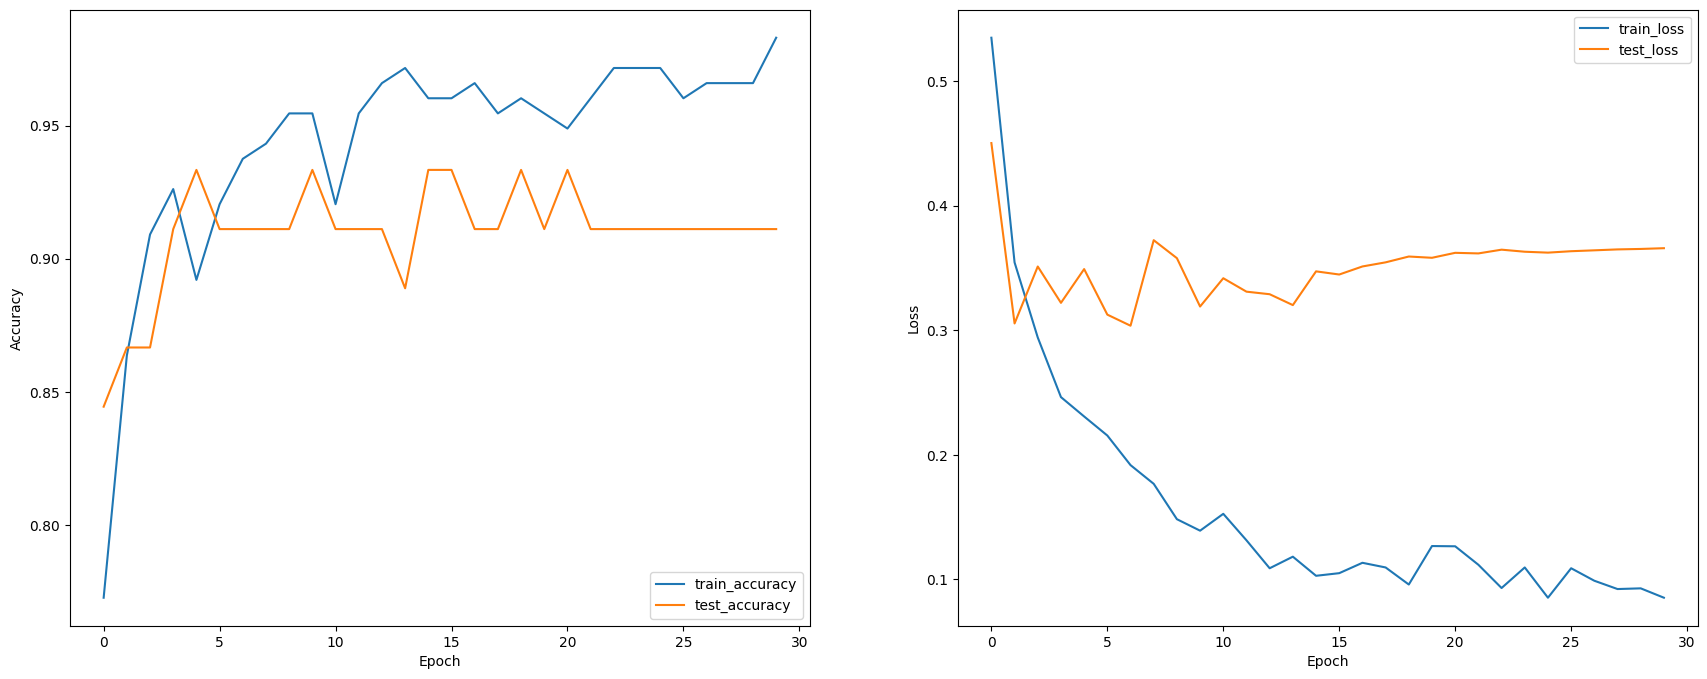

In [210]:
plt.figure(figsize=(21, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='train_loss')
plt.plot(history.history["val_loss"], label='test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

add the condition for prediction ground truth

In [259]:

#get the prediction
y_pred=model.predict(x_test)
#y_pred=np.argmax(y_pred,axis=1)

# Condition
condition = (y_pred > 0.85)

# Apply the condition to the array
arr_masked = np.where(condition, y_pred, 0)
print(arr_masked)

# Find the index of the maximum value that satisfies the condition
argmax_with_condition = np.argmax(arr_masked,axis=1)
print(argmax_with_condition)

2/2 [==============================] - 0s 49ms/step
[[0.987749   0.        ]
 [0.97515005 0.        ]
 [0.         0.999982  ]
 [0.9703821  0.        ]
 [0.         0.99996024]
 [0.9534339  0.        ]
 [0.85846615 0.        ]
 [0.         0.9999004 ]
 [0.         0.9999991 ]
 [0.9817082  0.        ]
 [0.         0.        ]
 [0.         0.99207073]
 [0.         0.99858046]
 [0.99923944 0.        ]
 [0.9919342  0.        ]
 [0.998165   0.        ]
 [0.         0.9999804 ]
 [0.         0.        ]
 [0.99998957 0.        ]
 [0.         0.95130324]
 [0.99997956 0.        ]
 [0.9942296  0.        ]
 [0.         0.999951  ]
 [0.         0.        ]
 [0.         1.        ]
 [0.         0.9997813 ]
 [0.9512996  0.        ]
 [0.94949347 0.        ]
 [0.95473963 0.        ]
 [0.95743114 0.        ]
 [0.8785783  0.        ]
 [0.         0.        ]
 [0.9816436  0.        ]
 [0.99938875 0.        ]
 [0.         0.99998987]
 [0.97295487 0.        ]
 [0.         0.9999995 ]
 [0.         0.99999684

In [260]:
y_test_class=[]


for i in y_test:
  for j,k in enumerate(i):
    if j==0:
      if k==1:
        y_test_class.append(0)

      else:
        y_test_class.append(1)
    else:pass



In [262]:

print(y_test)
print(y_test_class)


[[1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]]
[0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]


In [242]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

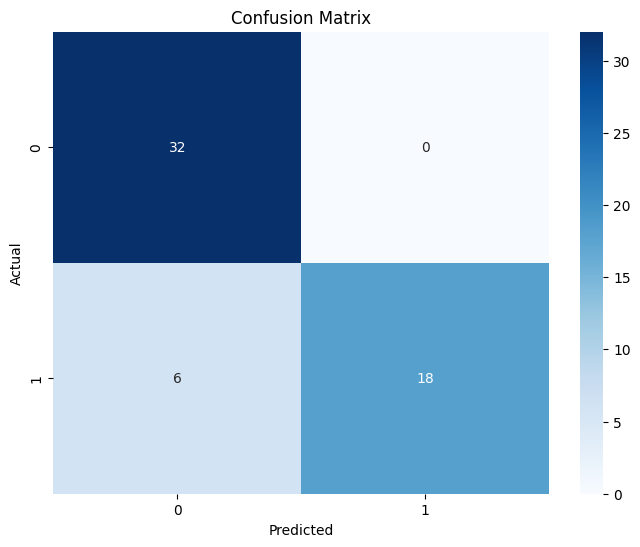

In [263]:
# Compute confusion matrix
cm = confusion_matrix(y_test_class,argmax_with_condition)

# Plot confusion matrix with color
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##Inferance



In [267]:
from keras.models import load_model
# Load the model
model1 = load_model("/content/dog_barking.hdf5")



def preprocessing (file_path, duration=10, sr=22050):
  input_length=sr*duration
  process_file=[]
  X, sr = librosa.load(file_path, sr=sr, duration=duration)
  dur = librosa.get_duration(y=X, sr=sr)
  # pad audio file same duration
  if (round(dur) < duration):
    y = librosa.util.fix_length(X, size= input_length)
  mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=25, n_fft=512,hop_length=2048).T,axis=0)
  feature = np.array(mfccs).reshape([-1,1])
  process_file.append(feature)
  process_file_array = np.asarray(process_file)
  return process_file_array


In [274]:
file_path="/content/drive/MyDrive/Work_space/Project/K9/dataset/dog&cat_voice/cat/cat_100.wav"#cat
#file_path="/content/drive/MyDrive/Work_space/Data set/Learn_Joy/function3/predict/i am good boy. i like mango and banana.wav"#human
#file_path="/content/drive/MyDrive/Work_space/Data set/Learn_Joy/function3/predict/i am good boy..wav"#human
#file_path="/content/drive/MyDrive/Work_space/Project/K9/dataset/cat_dog_voice/cats_dogs/test/test/dog_barking_12.wav"#dog


x_pred=preprocessing (file_path=file_path, duration=10, sr=22050)
#print(x_pred)
#print(x_pred.shape)

In [276]:
re_classe=[ ]


prediction=model1.predict(x_pred)
print(prediction)

y_pred = np.argmax(prediction,axis=1)
print(y_pred )

mlb.classes=['other', 'dog']

for i in range(len(prediction[0])):
    if prediction[0][i] >= 0.85:
        #print(f"{mlb.classes_[i]}: {round(predictions[0][i] * 100, 2)}%")
        re_classe.append(mlb.classes[i])
print(re_classe)
if re_classe is not None and "dog" in re_classe:
  print("This is dog barking sound")

else:
  print("This is not dog barking sound")


1/1 [==============================] - 0s 47ms/step
[[0.72484046 0.2369251 ]]
[0]
[]
This is not dog barking sound
